In [37]:
import os
from PIL import Image
from tensorflow.keras.preprocessing import image
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import LeakyReLU, Input
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import metrics
from tensorflow.keras.regularizers import l2
import tensorflow.keras.backend as K
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


In [38]:
import os
from sklearn.model_selection import train_test_split
from shutil import copyfile
# 데이터셋 디렉토리 설정
dataset_dir = './data/dataset/all_images/'
train_dir = './data/dataset/train/'
test_dir = './data/dataset/test/'
validation_dir = './data/dataset/validation/'
# 클래스별 이미지 파일 수를 정의
class_names = os.listdir(dataset_dir)
# 이미지 크기 및 배치 크기 설정
img_size = (299, 299)
batch_size = 32


In [39]:


# 데이터 증강 및 전처리 설정
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련, 검증, 테스트 데이터셋 경로 설정
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=img_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')


Found 31996 images belonging to 40 classes.
Found 4019 images belonging to 40 classes.
Found 3994 images belonging to 40 classes.


In [43]:


# 데이터 증강 및 전처리 설정
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련, 검증, 테스트 데이터셋 경로 설정
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=img_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# InceptionV3 모델 불러오기 (include_top=False: Fully Connected Layer를 포함하지 않음)
base_model = InceptionV3(input_shape=(299, 299, 3),
                        include_top=False,
                        weights='imagenet')

# 새로운 Fully Connected Layer 추가
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(len(class_names), activation='softmax')(x)

# 새로운 모델 생성
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 체크포인트 설정
checkpoint_filepath = './model/inceptionv3_checkpoint.h5'
model_checkpoint = ModelCheckpoint(checkpoint_filepath, 
                                   monitor='val_accuracy',
                                   save_best_only=True,
                                   mode='max',
                                   verbose=1)

# 저장된 체크포인트 불러오기
if os.path.exists(checkpoint_filepath):
    model.load_weights(checkpoint_filepath)
    print("Checkpoint loaded successfully!")

# 모델 훈련
history = model.fit(train_generator,
                    epochs=100,
                    initial_epoch=0,  # 중간에 멈췄다면 마지막 에폭부터 다시 시작
                    validation_data=validation_generator,
                    callbacks=[model_checkpoint])

# 모델 평가
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

# 모델 저장
model.save('./model/inceptionv3_model_final.h5')


Found 31996 images belonging to 40 classes.
Found 4019 images belonging to 40 classes.
Found 3994 images belonging to 40 classes.
Checkpoint loaded successfully!
Epoch 1/100
1000/1000 [==============================] - 596s 590ms/step - loss: 0.8693 - accuracy: 0.7316 - val_loss: 1.7142 - val_accuracy: 0.5481

Epoch 00001: val_accuracy improved from -inf to 0.54815, saving model to ./model\inceptionv3_checkpoint.h5
Epoch 2/100
1000/1000 [==============================] - 587s 586ms/step - loss: 0.8157 - accuracy: 0.7467 - val_loss: 1.0069 - val_accuracy: 0.6959

Epoch 00002: val_accuracy improved from 0.54815 to 0.69594, saving model to ./model\inceptionv3_checkpoint.h5
Epoch 3/100
1000/1000 [==============================] - 586s 585ms/step - loss: 0.7625 - accuracy: 0.7627 - val_loss: 1.1363 - val_accuracy: 0.6790

Epoch 00003: val_accuracy did not improve from 0.69594
Epoch 4/100
1000/1000 [==============================] - 586s 586ms/step - loss: 0.7111 - accuracy: 0.7793 - val_los


Epoch 00037: val_accuracy did not improve from 0.80493
Epoch 38/100
1000/1000 [==============================] - 583s 583ms/step - loss: 0.1754 - accuracy: 0.9418 - val_loss: 1.1154 - val_accuracy: 0.7636

Epoch 00038: val_accuracy did not improve from 0.80493
Epoch 39/100
1000/1000 [==============================] - 583s 583ms/step - loss: 0.1704 - accuracy: 0.9424 - val_loss: 1.2402 - val_accuracy: 0.7268

Epoch 00039: val_accuracy did not improve from 0.80493
Epoch 40/100
1000/1000 [==============================] - 583s 583ms/step - loss: 0.1675 - accuracy: 0.9437 - val_loss: 1.0866 - val_accuracy: 0.7656

Epoch 00040: val_accuracy did not improve from 0.80493
Epoch 41/100
1000/1000 [==============================] - 583s 583ms/step - loss: 0.1585 - accuracy: 0.9471 - val_loss: 0.7588 - val_accuracy: 0.8296

Epoch 00041: val_accuracy improved from 0.80493 to 0.82956, saving model to ./model\inceptionv3_checkpoint.h5
Epoch 42/100
1000/1000 [==============================] - 583s 58

1000/1000 [==============================] - 584s 583ms/step - loss: 0.0849 - accuracy: 0.9720 - val_loss: 0.9222 - val_accuracy: 0.8201

Epoch 00077: val_accuracy did not improve from 0.82956
Epoch 78/100
1000/1000 [==============================] - 584s 583ms/step - loss: 0.0848 - accuracy: 0.9717 - val_loss: 0.8879 - val_accuracy: 0.8278

Epoch 00078: val_accuracy did not improve from 0.82956
Epoch 79/100
1000/1000 [==============================] - 583s 583ms/step - loss: 0.0786 - accuracy: 0.9732 - val_loss: 1.0244 - val_accuracy: 0.8111

Epoch 00079: val_accuracy did not improve from 0.82956
Epoch 80/100
1000/1000 [==============================] - 583s 583ms/step - loss: 0.0784 - accuracy: 0.9747 - val_loss: 1.0142 - val_accuracy: 0.8144

Epoch 00080: val_accuracy did not improve from 0.82956
Epoch 81/100
1000/1000 [==============================] - 584s 583ms/step - loss: 0.0784 - accuracy: 0.9741 - val_loss: 0.9234 - val_accuracy: 0.8209

Epoch 00081: val_accuracy did not impr

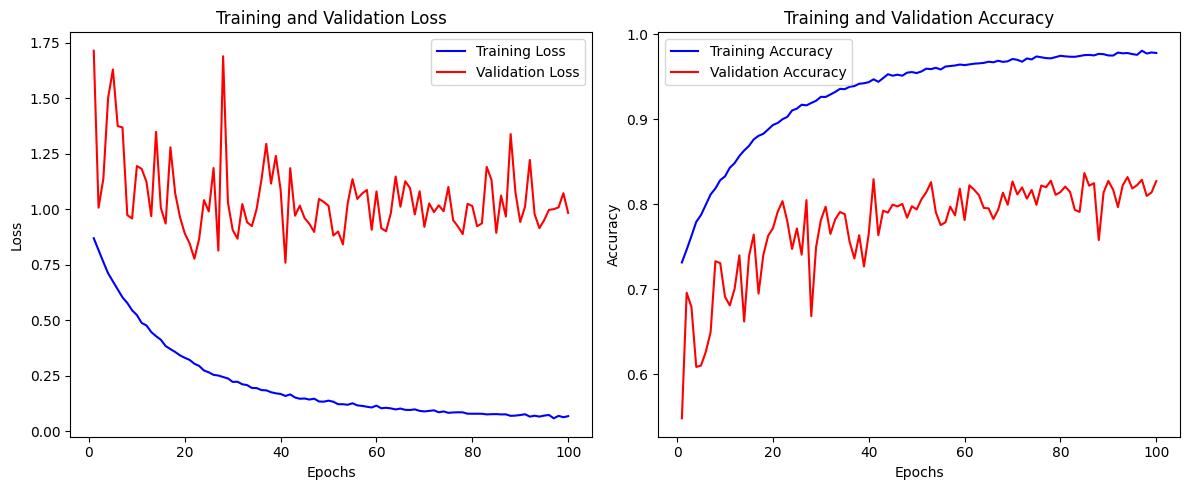

In [44]:
import matplotlib.pyplot as plt

# 훈련 중에 기록된 손실값과 정확도 가져오기
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# 에폭 수 가져오기
epochs = range(1, len(train_loss) + 1)

# 손실값 그래프
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 그래프 보여주기
plt.tight_layout()
plt.show()


In [35]:
# 이미지 경로 지정

image_path = './data/dataset/sample/sample_3.png'

In [36]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# 저장된 모델 파일 경로 지정
saved_model_path = './model/inceptionv3_model_final.h5'

# 모델 불러오기
loaded_model = load_model(saved_model_path)

# 이미지 불러오기 및 전처리
img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # 이미지를 0에서 1 사이로 정규화

# 모델 예측
predictions = loaded_model.predict(img_array)

# 클래스 인덱스 확인
predicted_class_index = np.argmax(predictions[0])

# 클래스 이름 확인
class_names = train_generator.class_indices
predicted_class_name = list(class_names.keys())[predicted_class_index]

# 예측 결과 출력
print(f'예측결과: {predicted_class_name}')


예측결과: 칼국수
